<a href="https://colab.research.google.com/github/rajeshchengannur/DeepLearning/blob/main/DL103_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Neuron


In [1]:
import numpy as np
import matplotlib.pyplot as plt

$S_{w,b}(x) =\frac{1}{1+e^{-(wx+b)}}$

In [2]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [3]:
#Lets test the function , We know that sigmoid goes from 0 to 1
sigmoid(1,0.5,0)

0.6224593312018546

In [10]:
w = 0.9
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

In [11]:
type(X)
type(Y)

numpy.ndarray

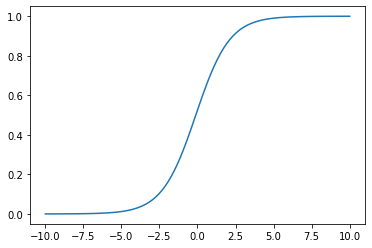

In [12]:
#We know that in the sigmoid function every element x,w,b are scalar. When we are passing a numpy array to function, it is doing python broad casting
# for each element of the array 
plt.plot(X,Y)
plt.show()

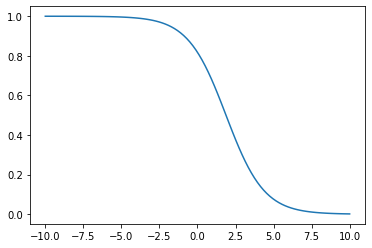

In [19]:
#I can flip the grph by changing the value of w from positve to negative
# if the change the value of b , the graph shifts
# we can change the value of w and b using sliders, in the code snippets , check for adding form fields
#google colab will interpret this as aslider
w = -0.8  #@param {type: "slider", min: -2, max: 2, step: 0.2}
b = 1.5 #@param {type: "slider", min: -2, max: 2, step: 0.2}
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

# By changing the value of w, we can see that w is controlling the graph.
# and b is controlling the posiiton

$S_{w_1,w_2,b}(x_1,x_2) =\frac{1}{1+e^{-(w_1x_1+w_2x_2+b)}}$
Sigmoid with 2 dimensional , 


In [21]:
def sigmoid_2D(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1 + w2*x2 +b)))

In [22]:
sigmoid_2D(1,0,0.5,0,0)

0.6224593312018546

In [29]:
#Lets google and see for 3 dimensional plot in matplotlib
from mpl_toolkits import mplot3d
X1= np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
# for every combination of x1 and x2 , I need to calculate y. For that I am using meshgrid
XX1, XX2 = np.meshgrid(X1, X2)
print(X1.shape,X2.shape,XX1.shape,XX2.shape)


(100,) (100,) (100, 100) (100, 100)


In [30]:
w1 =0.5
w2 =0.5
b=0
Y=sigmoid_2D(XX1,XX2,w1,w2,b)

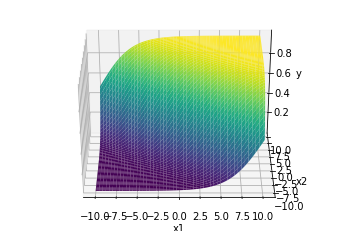

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(XX1, XX2, Y, 200, cmap='viridis', edgecolor='none')
ax.plot_surface(XX1, XX2, Y, cmap='viridis', edgecolor='none')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

#example, we'll use an elevation of 30 degrees (that is, 
#30 degrees above the x-y plane) and an azimuth of 270 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):
ax.view_init(30, 270)

# If you change the value of one of the weights, We can see that weight will do a major role 